<a href="https://colab.research.google.com/github/OMONa-E/Prediction-of-Product-Sales/blob/main/Omona_Emmanuel_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Omona Emmanuel

## Project Overview


## Load and Inspect Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
import numpy as np
import missingno as msno

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

df_sales_pred = pd.read_csv(fpath)

df_sales_pred.info()
df_sales_pred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Making a copy of our dataframe and saving it in a variable
df_sales_pred_1 = df_sales_pred.copy()

## Clean Data


In [25]:
# Knowing how many rows and columns in our dataframe (use .shape attribute)
num_row_col = df_sales_pred.shape

# This returns a tuple of row, column numbers
num_row_col

(8523, 12)

In [26]:
# Knowing the datatypes that make up our dataframe (use an attribute .dtypes)
data_types = df_sales_pred.dtypes

# returns a Series
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
# Inspecting for duplicates and dropping them
duplicates_row = df_sales_pred.duplicated(keep=False)

duplicates_row.sum()

# df_sales_pred[duplicates_row]

0

In [28]:
# testing for percentage uniqueness
df_sales_pred.nunique() / len(df_sales_pred) * 100

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.023466
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [29]:
# Filtering for Item_Identifier duplicates occurence
duplicates_item_identifier = df_sales_pred.duplicated(subset=['Item_Identifier'], keep=False)

duplicates_item_identifier.sum()

8514

In [30]:
# Displaying duplicate occurence
df_sales_pred[duplicates_item_identifier].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,MISSING,Tier 2,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1693,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,MISSING,Tier 3,Grocery Store,283.6308
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,MISSING,Tier 2,Supermarket Type1,2274.3728
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,MISSING,Tier 3,Grocery Store,324.9104
1896,NCZ54,999.00,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [31]:
# Diplaying duplicates occurence
df_sales_pred[duplicates_item_identifier].sort_values('Outlet_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2966,FDY60,10.500,Regular,0.044140,Baking Goods,143.9128,OUT010,1998,MISSING,Tier 3,Grocery Store,143.8128
4257,FDR07,21.350,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,MISSING,Tier 3,Grocery Store,190.4188
4265,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,1998,MISSING,Tier 3,Grocery Store,36.6190
6044,NCM06,7.475,Low Fat,0.126753,Household,154.2656,OUT010,1998,MISSING,Tier 3,Grocery Store,308.9312
1951,FDA03,18.500,Regular,0.076097,Dairy,145.8102,OUT010,1998,MISSING,Tier 3,Grocery Store,291.6204
...,...,...,...,...,...,...,...,...,...,...,...,...
3939,FDO13,7.865,Low Fat,0.061155,Breakfast,165.3526,OUT049,1999,Medium,Tier 1,Supermarket Type1,1151.1682
3942,FDX11,16.000,Regular,0.106918,Baking Goods,183.5634,OUT049,1999,Medium,Tier 1,Supermarket Type1,4725.8484
3943,NCW41,18.000,Low Fat,0.000000,Health and Hygiene,158.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,3327.6684
7546,FDO52,11.600,Regular,0.077285,Frozen Foods,172.4106,OUT049,1999,Medium,Tier 1,Supermarket Type1,4277.7650


In [32]:
# Identifying missing values
df_sales_pred.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

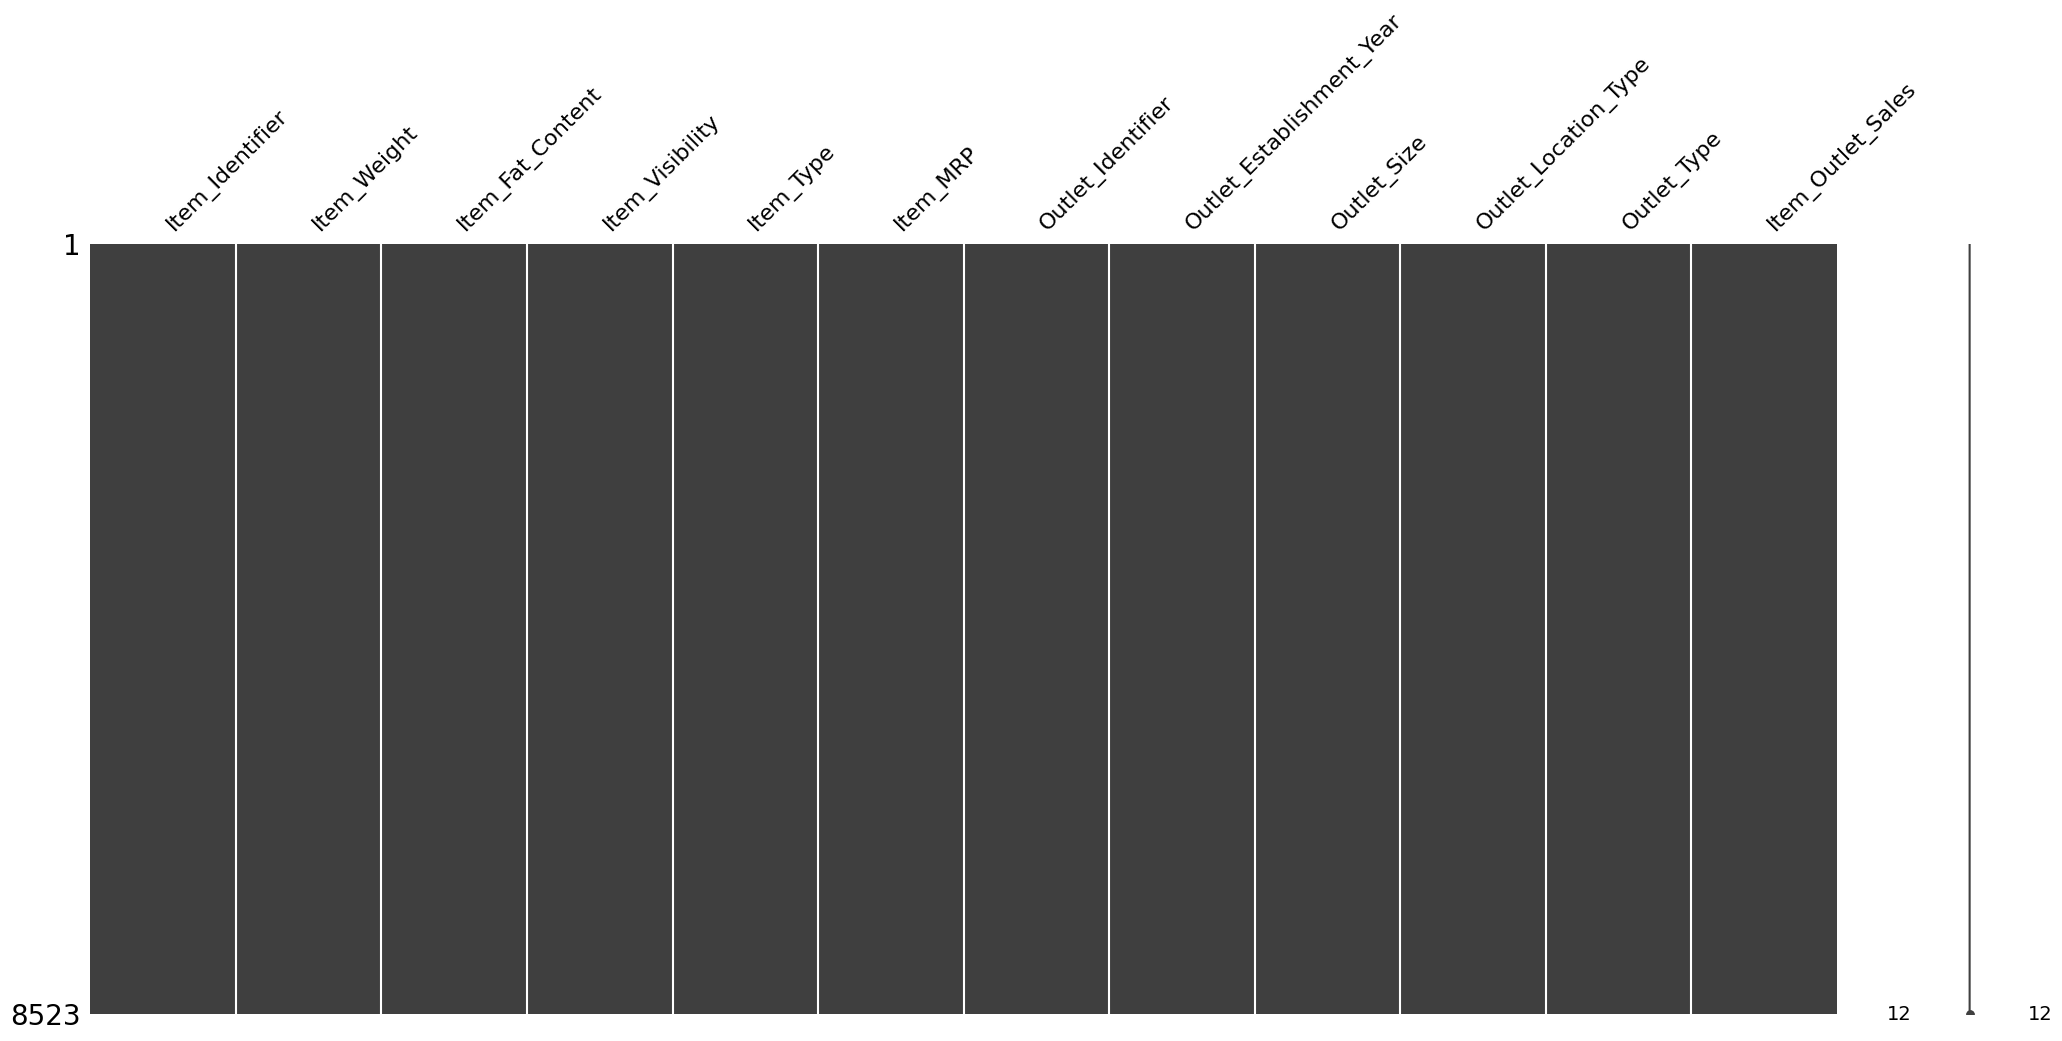

In [33]:
#  Visualing missing data in matrix
msno.matrix(df_sales_pred)

In [34]:
# Sorting out string/object features
obj_sales_col = df_sales_pred.select_dtypes('object').columns

df_sales_pred[obj_sales_col].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [35]:
# Visualizing using dataframe slicing
df_sales_pred[['Outlet_Size']]

# Visualizing using .value_counts() method
df_sales_pred['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [36]:
# Filling up for the missing values
df_sales_pred['Outlet_Size'].fillna('MISSING', inplace=True)

# Visualizing and confirming if filled up
df_sales_pred['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [37]:
# Addressing missing values usings a placeholder value
# Sorting out number features
num_sales_col = df_sales_pred.select_dtypes('number').columns

df_sales_pred[num_sales_col].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [38]:
# Visualizing missing values with .value_counts() method
df_sales_pred['Item_Weight'].value_counts(dropna=False)

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

In [39]:
# describing the Item_Weight
df_sales_pred['Item_Weight'].describe()

count    8523.000000
mean      182.132110
std       371.899127
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max       999.000000
Name: Item_Weight, dtype: float64

In [40]:
# Filling the missing value with 999
# since max weight is 21.350
df_sales_pred['Item_Weight'].fillna(999, inplace=True)

# Visualizing using .value_counts() method
df_sales_pred['Item_Weight'].value_counts(dropna=True)

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

<Axes: >

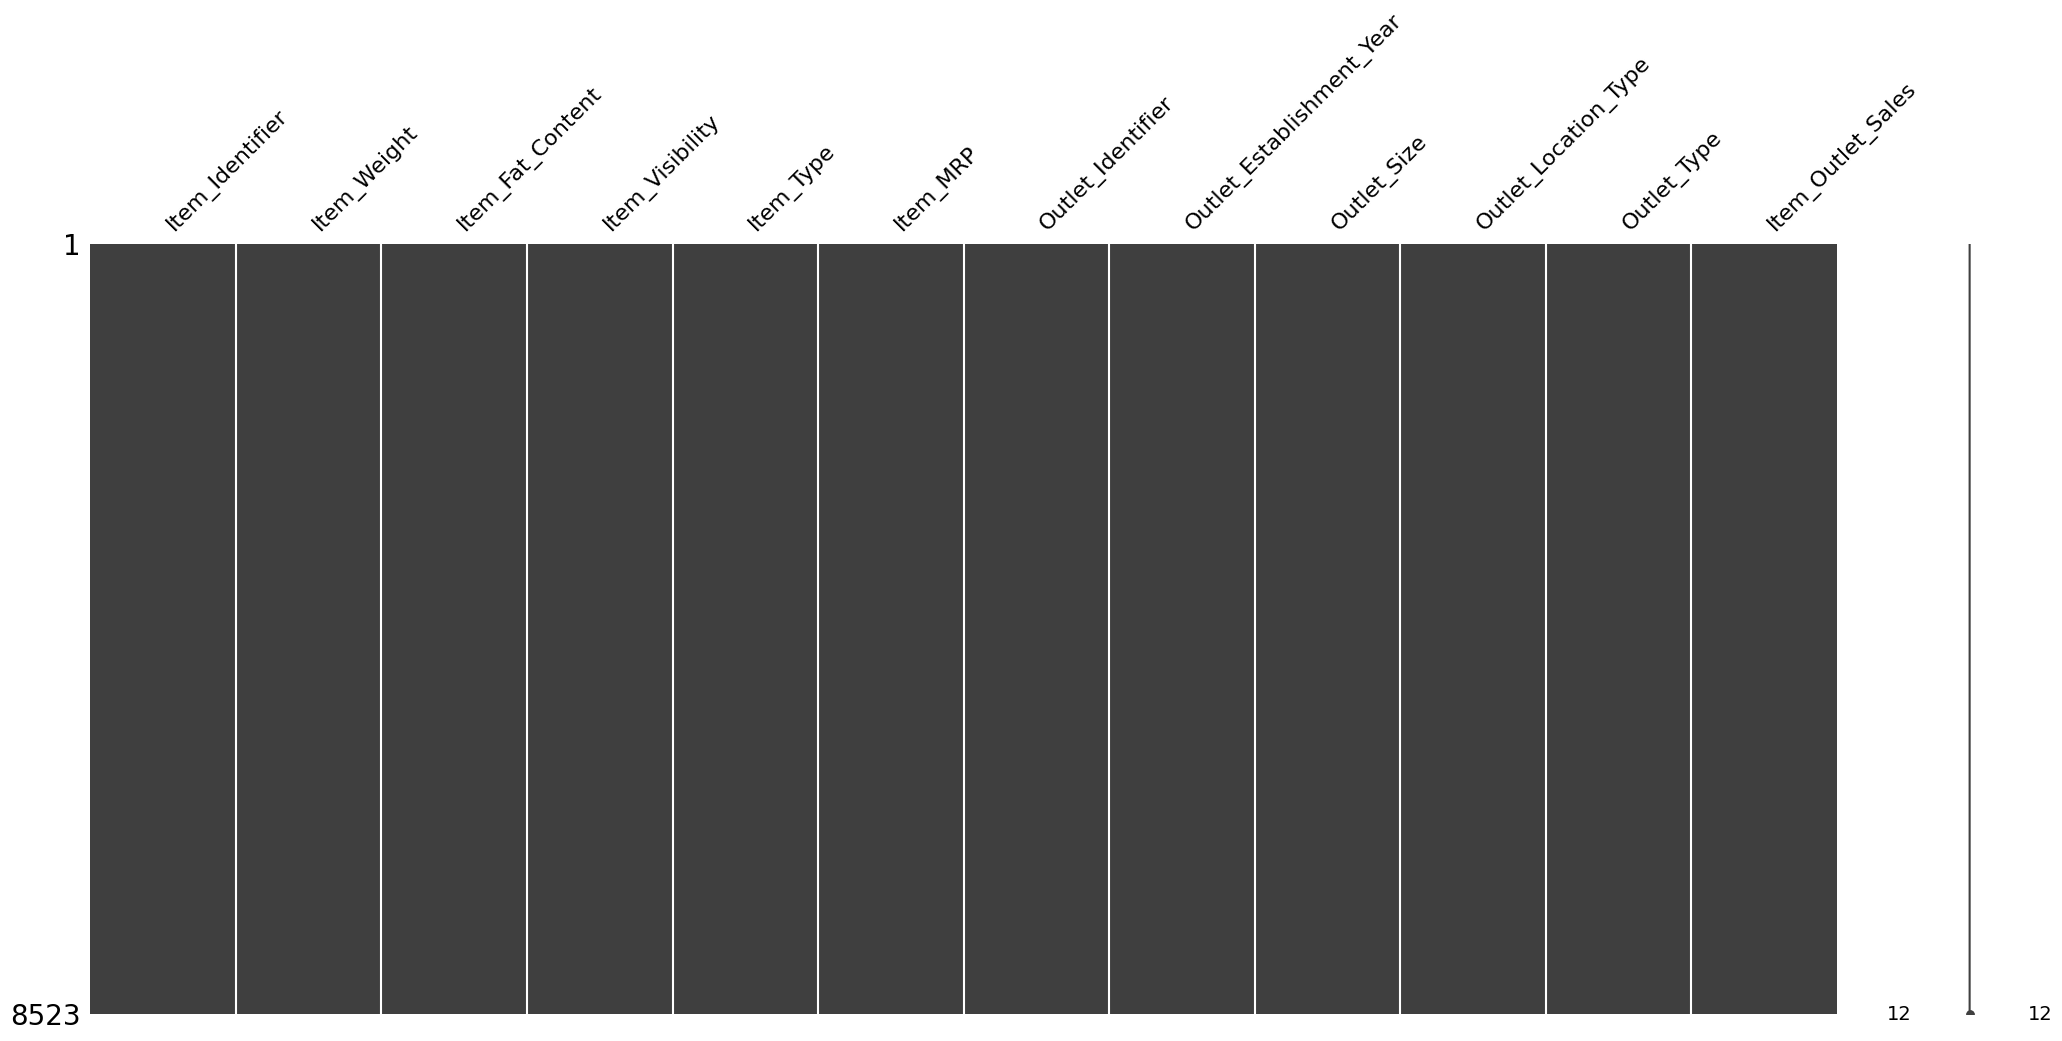

In [41]:
# Confirming for no missing values after address
msno.matrix(df_sales_pred)

In [42]:
# Quering for records inconsistency and fixing them for categorical features
# using characters
for item in obj_sales_col:
  print(f'{item} column')
  print(f"{df_sales_pred[item].value_counts()}")
  print('\n')

Item_Identifier column
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content column
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Item_Type column
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier column
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name

In [43]:
# Working on inconsistency column
df_sales_pred['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [44]:
# Replacing the inconsistency
df_sales_pred['Item_Fat_Content'].replace({
    "LF" : 'Low Fat',
    "reg" : 'Regular',
    "low fat" : 'Low Fat'
}, inplace=True)

# Visualizing inconsistency
df_sales_pred['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [45]:
# Visualizing central tendency for numerical features
# i.e min, max, mean, mode, ..etc values
for item in num_sales_col:
  print(f"{item} Feature/Column/Series Central tendency")
  print(f'{df_sales_pred[item].describe()}')
  print('\n')

Item_Weight Feature/Column/Series Central tendency
count    8523.000000
mean      182.132110
std       371.899127
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max       999.000000
Name: Item_Weight, dtype: float64


Item_Visibility Feature/Column/Series Central tendency
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP Feature/Column/Series Central tendency
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year Feature/Column/Series Central tendency
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000


## Exploratory Data Analysis


In [47]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

#### Viszualizing our df_sale_pred dataframe

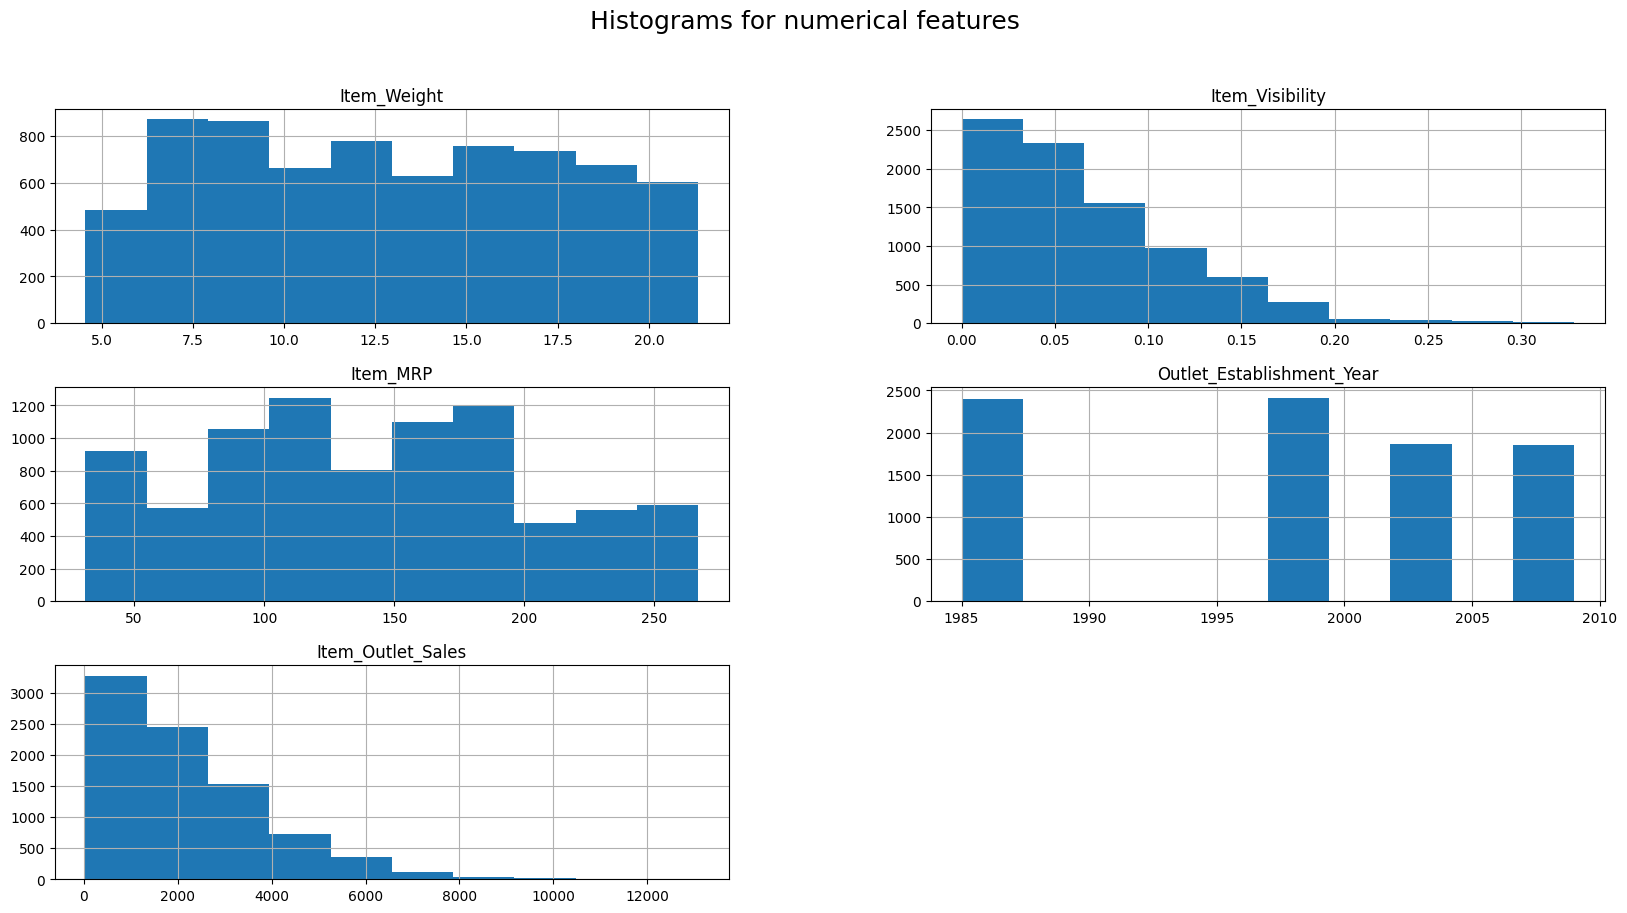

In [65]:
# Histograms to view the distributions of numerical features in your dataset.
numerical_features = df_sales_pred.select_dtypes('number').columns

df_sales_pred[numerical_features].hist(bins=10, figsize=(20, 10))
plt.suptitle('Histograms for numerical features', fontsize=18)
plt.show();

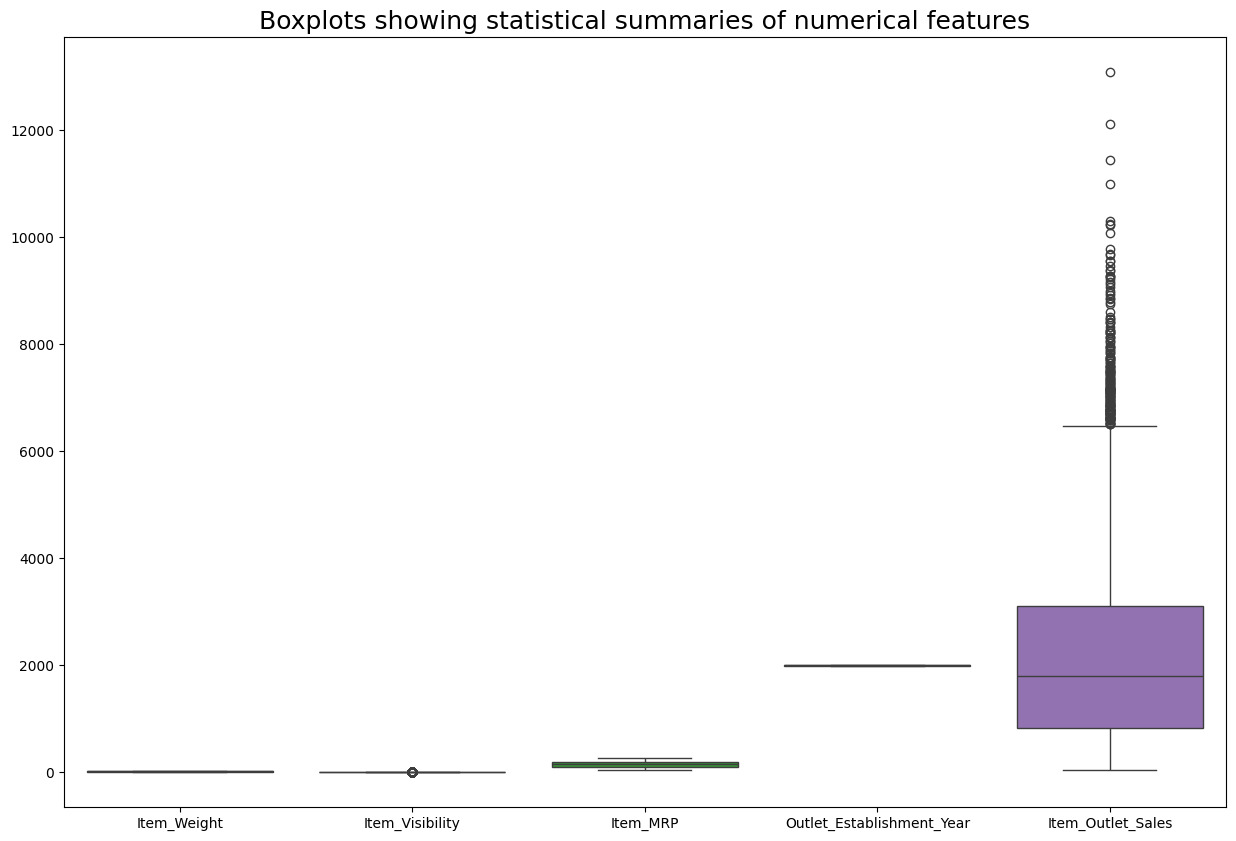

In [81]:
# Boxplots to view statistical summaries of numerical features in your dataset.
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_sales_pred[numerical_features])
plt.title('Boxplots showing statistical summaries of numerical features', fontsize=18)
plt.show();

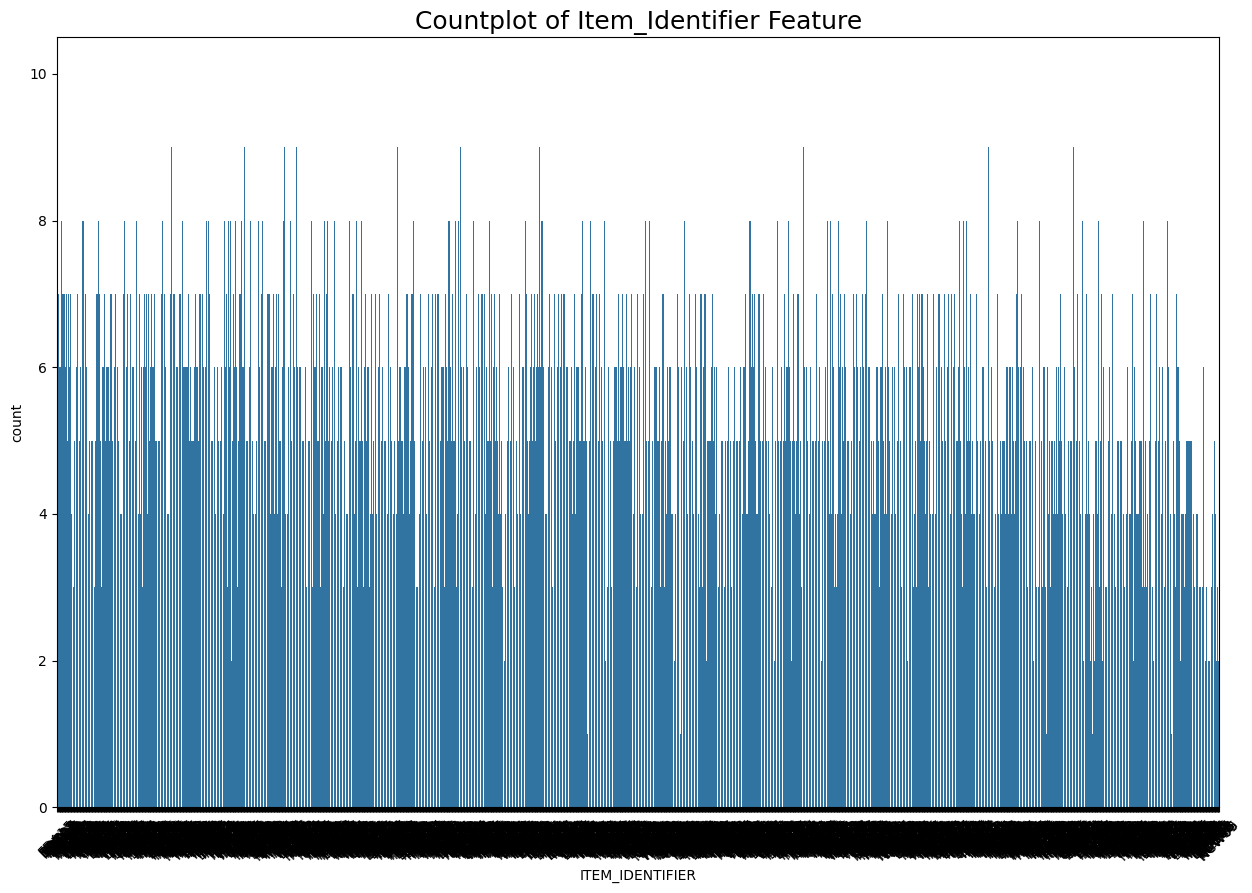

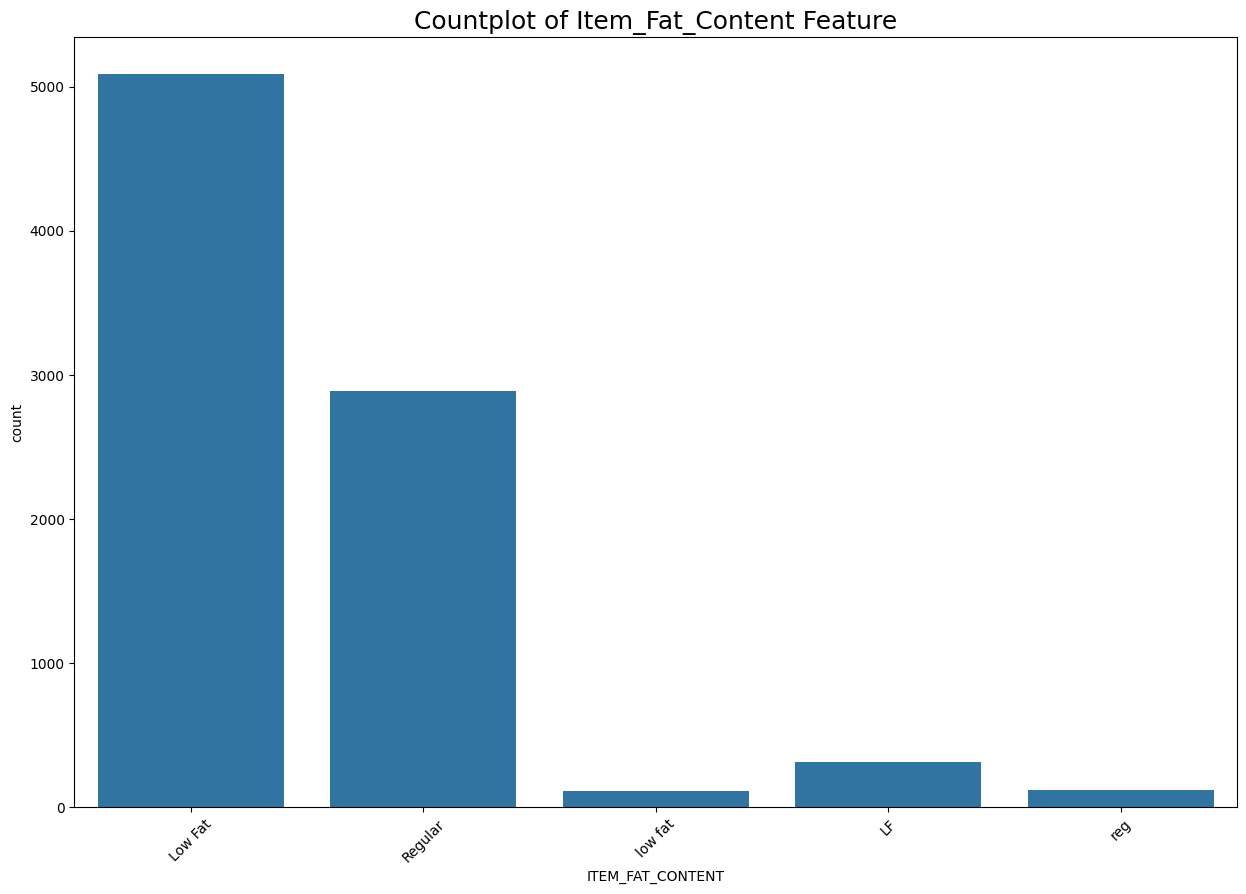

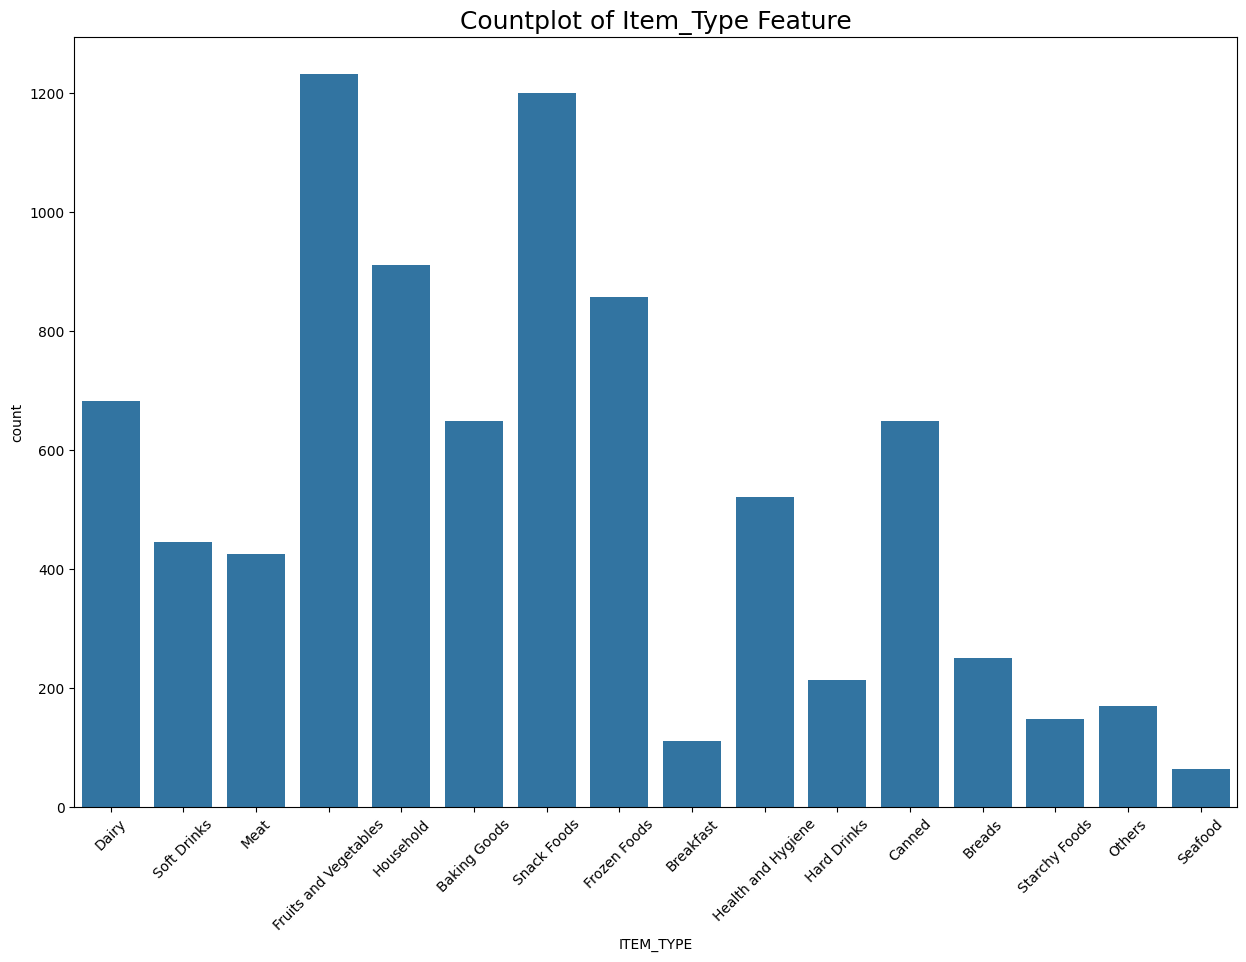

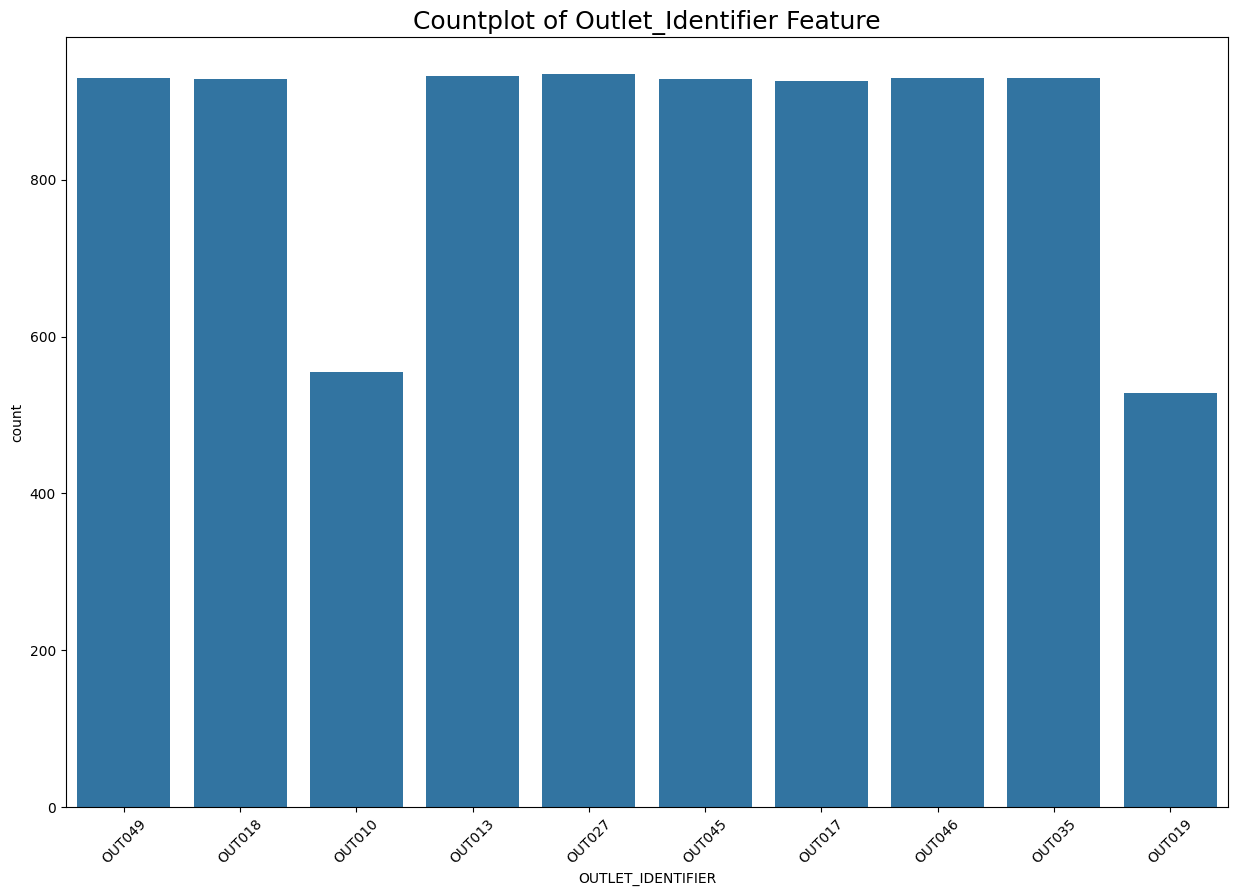

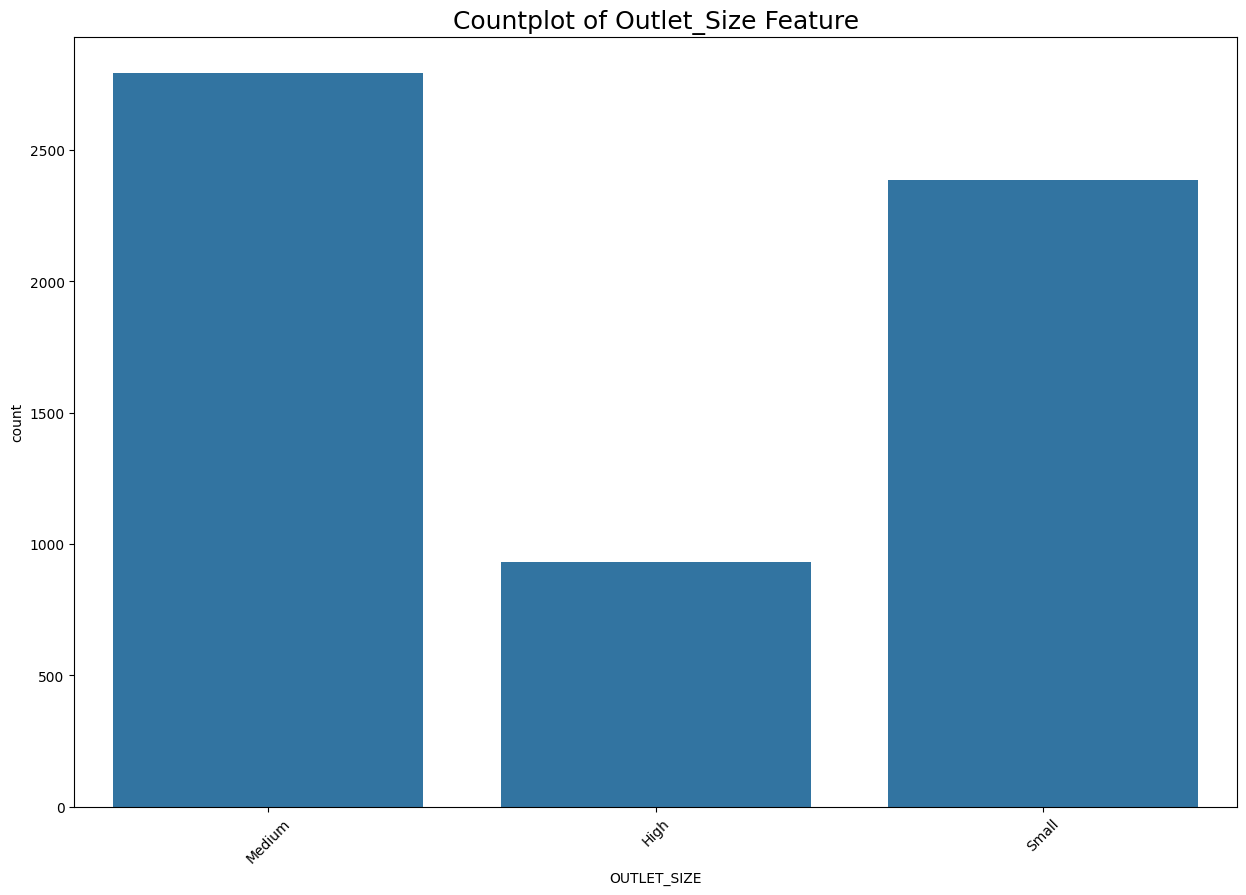

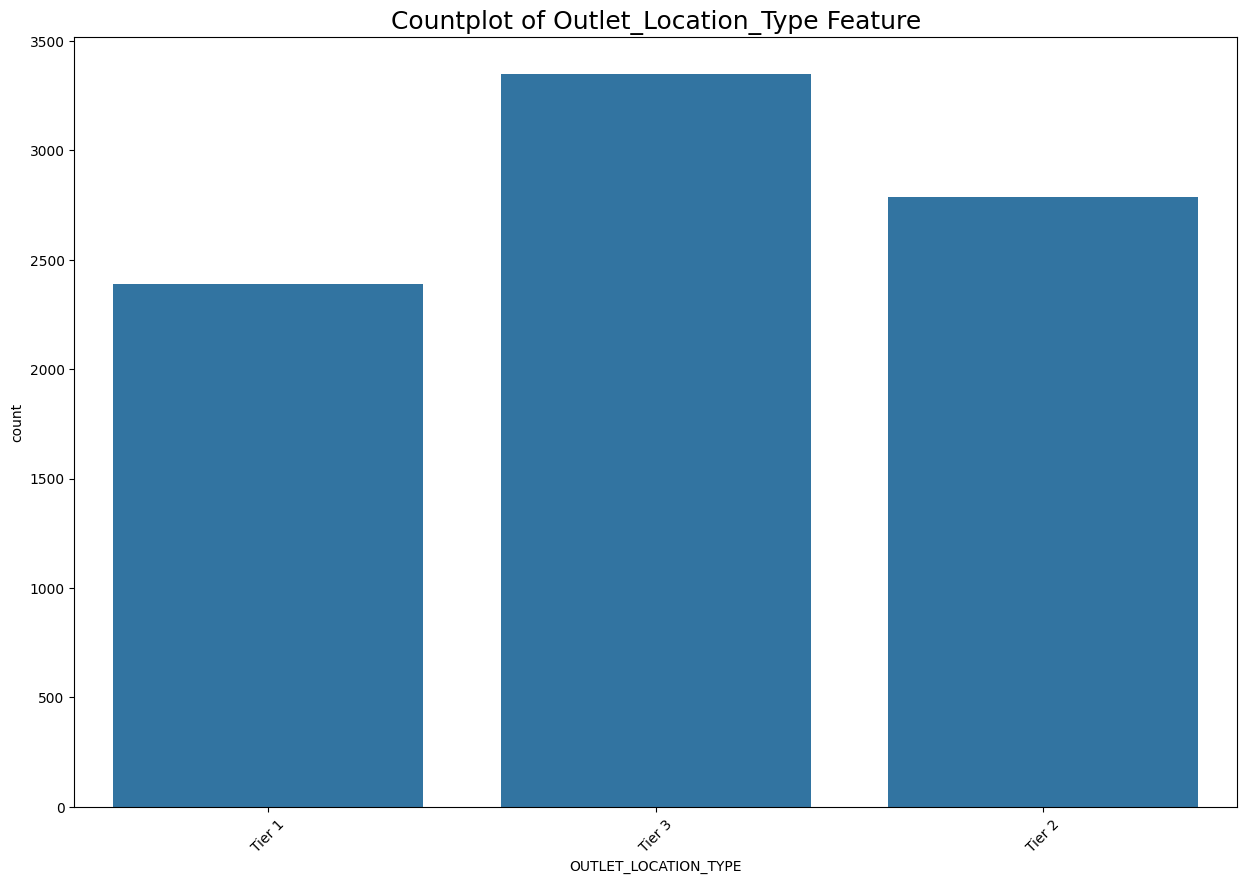

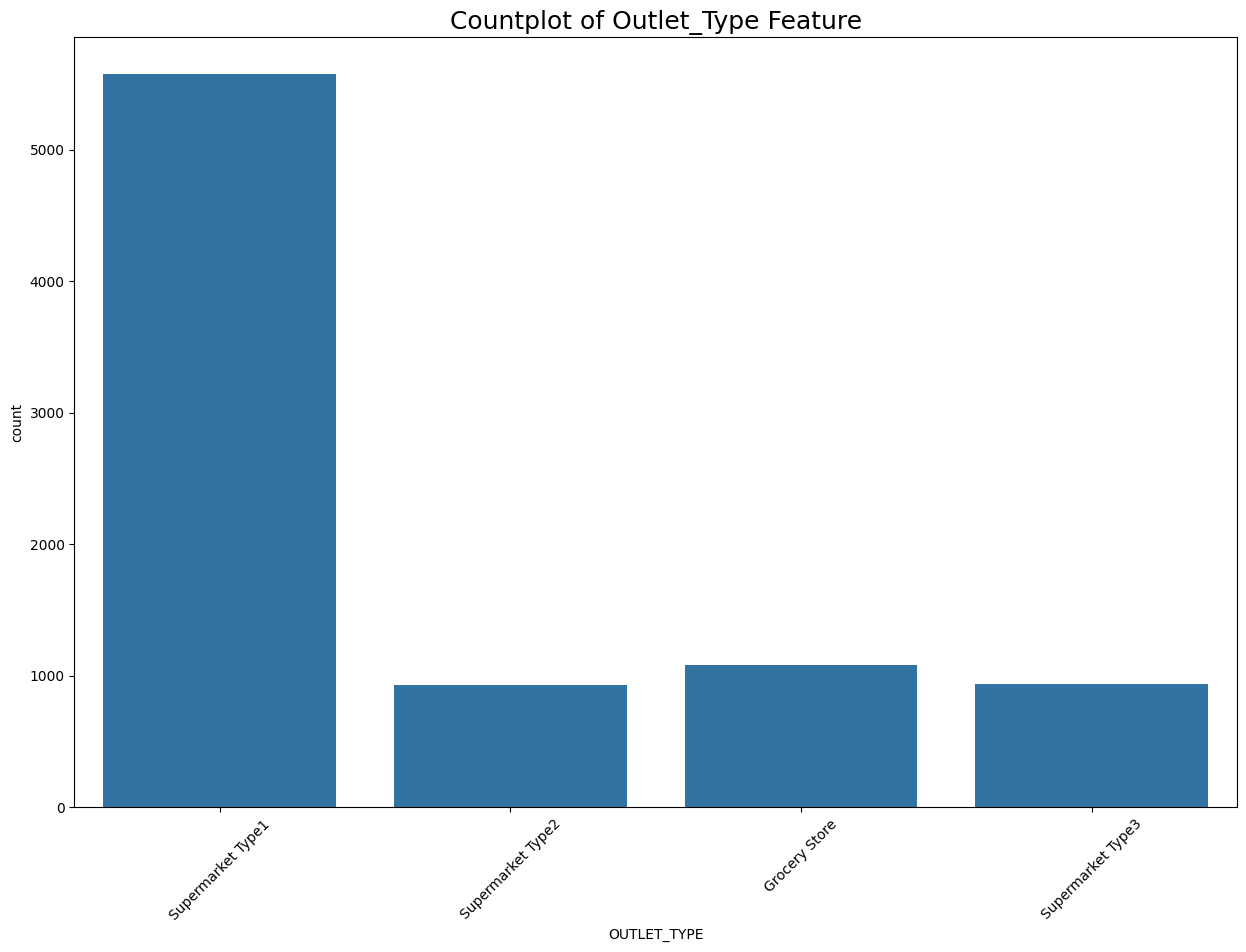

In [107]:
# Countplots to view the frequency of each class of categorial features in your dataset.
categorical_features = df_sales_pred.select_dtypes('object').columns

def count_plot(cate):
  plt.figure(figsize=(15, 10))
  plt.title(f'Countplot of {cate} Feature', fontsize=18)
  sns.countplot(data=df_sales_pred, x=cate)
  plt.xticks(rotation=45)
  plt.xlabel(item.upper())
  plt.show();

for item in categorical_features:
  count_plot(item)
  print('\n')

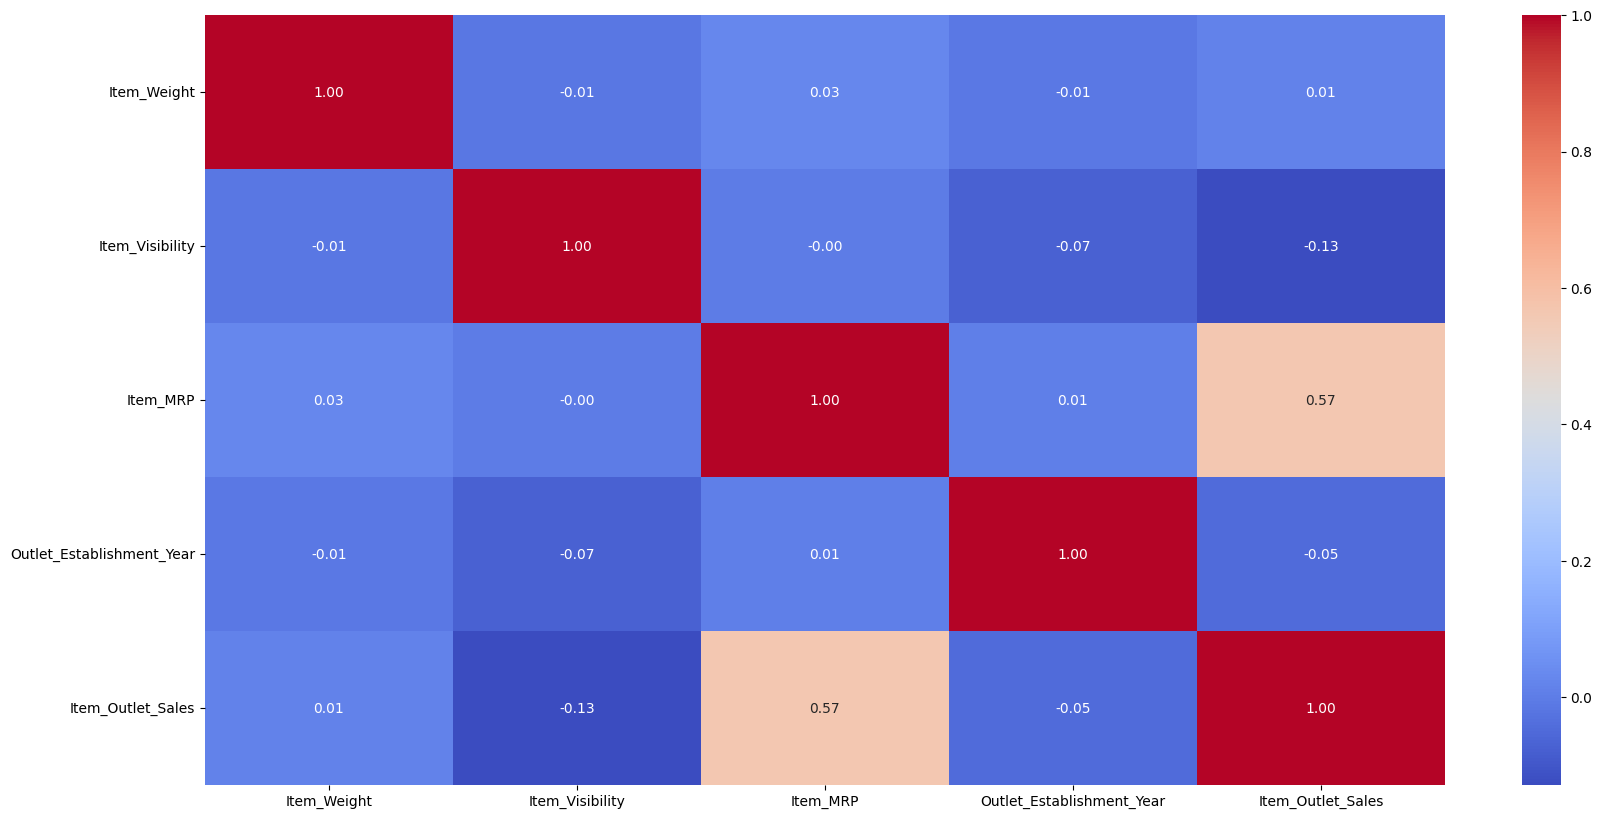

In [114]:
# Heatmap to view the correlation between features
plt.figure(figsize=(20, 10))
corr = df_sales_pred.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show();

## Feature Inspection